<a href="https://colab.research.google.com/github/FahimHafiz/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**
Reference: https://clauswilke.com/dataviz/

### Hospital data exploration, preprocessing and visualization

different color link: https://www.color-hex.com/

In [ ]:
# You can clone the repository to connect the datasets path in Colab or your local machine 
# !git clone https://github.com/FahimHafiz/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning.git

Cloning into 'Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 4), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 568.43 KiB | 9.32 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [34]:
# importing packages...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import os
# %matplotlib inline

In [41]:
result_directory = r'D:\Research\Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning\results'

In [56]:
# Before and after vaccine data
# before_vaccine_data = pd.read_csv('/content/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning/datasets/Hospital_data_before_Vaccination.csv')
before_vaccine_data = pd.read_csv('D:\Research\Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning\datasets\Hospital_data_before_Vaccination.csv')
before_vaccine_data['Vaccine'] = 0
before_vaccine_data

,UniqueID,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Vaccine
0,1,2010-12-01 00:00:00,14,Very Severe Disease,Mymensingh,Address1,Referred,2010-12-23 00:00:00,0
1,2,2010-02-11 00:00:00,6,Very Severe Disease,Rangpur,Address2,Referred,2010-03-01 00:00:00,0
2,3,2010-10-04 00:00:00,38,NaN,Mymensingh,Address3,Discharged,2010-10-14 00:00:00,0
3,4,2010-02-05 00:00:00,50,Missing,Rangpur,Address4,Died,2010-02-16 00:00:00,0
4,5,2010-01-26 00:00:00,23,Meningitis,Rangpur,Address5,DORB,2010-01-29 00:00:00,0
...,...,...,...,...,...,...,...,...,...
577,578,2015-03-24 00:00:00,16,Missing,Mymensingh,Address578,Referred,2015-03-28 00:00:00,0
578,579,2015-10-16 00:00:00,43,Missing,Mymensingh,Address579,Discharged,2015-11-01 00:00:00,0
579,580,2015-03-08 00:00:00,34,Not eligible,Dhaka,Address580,Referred,2015-03-23 00:00:00,0
580,581,2015-01-20 00:00:00,38,Missing,Chittagong,Address581,Discharged,2015-02-13 00:00:00,0


In [57]:
# Before and after vaccine data
# after_vaccine_data = pd.read_csv('/content/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning/datasets/Hospital_data_after_Vaccination.csv')
after_vaccine_data = pd.read_csv('D:\Research\Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning\datasets\Hospital_data_after_Vaccination.csv')
after_vaccine_data['Vaccine'] = 1
after_vaccine_data

,UniqueID,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Vaccine
0,583,13/07/2016 00:00,37,Missing,Rangpur,Address583,Referred,07/08/2016 00:00,1
1,584,19/03/2016 00:00,32,Enteric Fever,Khulna,Address584,Referred,10/04/2016 00:00,1
2,585,08/01/2016 00:00,45,Severe Pneumonia,Chittagong,Address585,DORB,05/02/2016 00:00,1
3,586,02/02/2016 00:00,7,Enteric Fever,Rangpur,Address586,Died,19/02/2016 00:00,1
4,587,04/02/2016 00:00,8,Enteric Fever,Dhaka,Address587,Referred,16/02/2016 00:00,1
...,...,...,...,...,...,...,...,...,...
339,922,02/04/2020 00:00,2,Enteric Fever,Rangpur,Address922,Died,30/04/2020 00:00,1
340,923,02/09/2020 00:00,35,Meningitis,Chittagong,Address923,DORB,14/09/2020 00:00,1
341,924,08/05/2020 00:00,29,Not eligible,Mymensingh,Address924,Discharged,18/05/2020 00:00,1
342,925,24/12/2020 00:00,35,Meningitis,Dhaka,Address925,Discharged,26/12/2020 00:00,1


# Let's convert the date argument to datetime format and add additional 'year' column for the admitted and release data

In [58]:
# Before vaccine data
before_vaccine_data['AdmDate'] = pd.to_datetime(before_vaccine_data['AdmDate'])
before_vaccine_data['year'] = before_vaccine_data['AdmDate'].dt.year
before_vaccine_data['Discharge Date'] = pd.to_datetime(before_vaccine_data["Discharge Date"])
# print(f"before_vaccine_data:{before_vaccine_data.head()}")
print("before_vaccine_data: \n")
print(before_vaccine_data.head().to_string())


# After vaccine data

after_vaccine_data['AdmDate'] = pd.to_datetime(after_vaccine_data['AdmDate'], dayfirst=True)
after_vaccine_data['year'] = after_vaccine_data['AdmDate'].dt.year
after_vaccine_data['Discharge Date'] = pd.to_datetime(after_vaccine_data["Discharge Date"], dayfirst=True)
print("after_vaccine_data: \n")
print(after_vaccine_data.tail().to_string())

before_vaccine_data: 

   UniqueID    AdmDate  Age (month)      Case Definition        Zila   Address     Outcome Discharge Date  Vaccine  year
0         1 2010-12-01           14  Very Severe Disease  Mymensingh  Address1    Referred     2010-12-23        0  2010
1         2 2010-02-11            6  Very Severe Disease     Rangpur  Address2    Referred     2010-03-01        0  2010
2         3 2010-10-04           38                  NaN  Mymensingh  Address3  Discharged     2010-10-14        0  2010
3         4 2010-02-05           50              Missing     Rangpur  Address4        Died     2010-02-16        0  2010
4         5 2010-01-26           23           Meningitis     Rangpur  Address5        DORB     2010-01-29        0  2010
after_vaccine_data: 

     UniqueID    AdmDate  Age (month) Case Definition        Zila     Address     Outcome Discharge Date  Vaccine  year
339       922 2020-04-02            2   Enteric Fever     Rangpur  Address922        Died     2020-04-30     

# Concatenet the before and after vaccine data

In [59]:
# concatenete the before and after datasets
final_data = pd.concat([before_vaccine_data, after_vaccine_data], ignore_index=True)
# Optional: Sort the DataFrame by the year column if needed
final_data = final_data.sort_values(by='year')
final_data.reset_index(drop=True, inplace=True)

print("Before and after merged data: \n")
print(final_data.to_string())

Before and after merged data: 

     UniqueID    AdmDate  Age (month)      Case Definition        Zila     Address     Outcome Discharge Date  Vaccine  year
0           1 2010-12-01           14  Very Severe Disease  Mymensingh    Address1    Referred     2010-12-23        0  2010
1          58 2010-06-15           42                  NaN  Mymensingh   Address58        Died     2010-07-15        0  2010
2          57 2010-03-15            9         Not eligible     Barisal   Address57        Died     2010-04-06        0  2010
3          56 2010-08-28           13     Severe Pneumonia     Barisal   Address56    Referred     2010-09-20        0  2010
4          55 2010-05-16           54              Missing      Sylhet   Address55  Discharged     2010-06-15        0  2010
5          54 2010-01-17           42              Missing       Dhaka   Address54    Referred     2010-01-28        0  2010
6          53 2010-10-10           12  Very Severe Disease      Sylhet   Address53    Referre

# Now that we merged all the patients data, we need to add the lab data which has each unique patient's collected sample data into the final data.
But, before we do that, let's load the lab_data and check if final_data, lab_data has unique ID values or not?

In [60]:
lab_data = pd.read_csv('D:\Research\Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning\datasets\Lab_data.csv')
print("lab_data for all the patients: ")
print(lab_data.to_string())
print(f"number of unique ID patients in the lab data: {np.size(np.unique(lab_data['UniqueID']))}")
print(f"number of unique ID patients in the final merged data: {np.size(np.unique(final_data['UniqueID']))}")

lab_data for all the patients: 
     UniqueID   Organism source   method
0           1  Organism1    CSF      PCR
1           2  Organism1   both      PCR
2           3  Organism1  Blood  culture
3           4  Organism1    CSF      PCR
4           5  Organism1  Blood  culture
5           6  Organism1   both      PCR
6           7  Organism1    CSF      ICT
7           8  Organism1    CSF  culture
8           9  Organism1   both  culture
9          10  Organism1   both      PCR
10         11  Organism1  Blood  culture
11         12  Organism1  Blood  culture
12         13  Organism1  Blood  culture
13         14  Organism1  Blood  culture
14         15  Organism1  Blood  culture
15         16  Organism1    CSF      PCR
16         17  Organism1   both  culture
17         18  Organism1   both  culture
18         19  Organism1    CSF  culture
19         20  Organism1    CSF      ICT
20         21  Organism1  Blood  culture
21         22  Organism1  Blood  culture
22         23  Organism1 

In [61]:
# merge the hospital data with the lab data according to the UniqueID
df_final = pd.merge(final_data, lab_data, on='UniqueID', how='inner')
df_final.head()

,UniqueID,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Vaccine,year,Organism,source,method
0,1,2010-12-01,14,Very Severe Disease,Mymensingh,Address1,Referred,2010-12-23,0,2010,Organism1,CSF,PCR
1,58,2010-06-15,42,NaN,Mymensingh,Address58,Died,2010-07-15,0,2010,Organism1,both,culture
2,57,2010-03-15,9,Not eligible,Barisal,Address57,Died,2010-04-06,0,2010,Organism1,Blood,culture
3,56,2010-08-28,13,Severe Pneumonia,Barisal,Address56,Referred,2010-09-20,0,2010,Organism1,CSF,PCR
4,55,2010-05-16,54,Missing,Sylhet,Address55,Discharged,2010-06-15,0,2010,Organism1,both,ICT


In [62]:
# Calculate the duration of a patient staying at the hospital
df_final['Duration'] = abs((df_final['AdmDate'] - df_final['Discharge Date']).dt.days)

df_final.head()

,UniqueID,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Vaccine,year,Organism,source,method,Duration
0,1,2010-12-01,14,Very Severe Disease,Mymensingh,Address1,Referred,2010-12-23,0,2010,Organism1,CSF,PCR,22
1,58,2010-06-15,42,NaN,Mymensingh,Address58,Died,2010-07-15,0,2010,Organism1,both,culture,30
2,57,2010-03-15,9,Not eligible,Barisal,Address57,Died,2010-04-06,0,2010,Organism1,Blood,culture,22
3,56,2010-08-28,13,Severe Pneumonia,Barisal,Address56,Referred,2010-09-20,0,2010,Organism1,CSF,PCR,23
4,55,2010-05-16,54,Missing,Sylhet,Address55,Discharged,2010-06-15,0,2010,Organism1,both,ICT,30


# Dataset Preprocessing..

In [63]:
# Let's remove the unnecessary columns before we further process..
df_final.drop(['UniqueID','AdmDate', 'Discharge Date', 'Address'], axis=1, inplace=True)
df_final.head()

,Age (month),Case Definition,Zila,Outcome,Vaccine,year,Organism,source,method,Duration
0,14,Very Severe Disease,Mymensingh,Referred,0,2010,Organism1,CSF,PCR,22
1,42,NaN,Mymensingh,Died,0,2010,Organism1,both,culture,30
2,9,Not eligible,Barisal,Died,0,2010,Organism1,Blood,culture,22
3,13,Severe Pneumonia,Barisal,Referred,0,2010,Organism1,CSF,PCR,23
4,54,Missing,Sylhet,Discharged,0,2010,Organism1,both,ICT,30


In [64]:
# Drop missing values
# let's first see how many missing values each column has.....
print("Checking null values: \n")
print(df_final.isnull().sum())

Checking null values: 

Age (month)         0
Case Definition    97
Zila                7
Outcome             0
Vaccine             0
year                0
Organism            0
source              0
method              0
Duration            0
dtype: int64


In [65]:
# Drop the rows considering the null value sin 'Case Definition' and 'Zila'
df_final.dropna(inplace=True, subset=['Case Definition', 'Zila'])
print(df_final.isnull().sum())

Age (month)        0
Case Definition    0
Zila               0
Outcome            0
Vaccine            0
year               0
Organism           0
source             0
method             0
Duration           0
dtype: int64


In [66]:
# Let's save the final preprocessed data..
clean_data = df_final
clean_data.to_csv(os.path.join(result_directory, "Final_patient_clean_data.csv"), index=False)

In [67]:
hospital_data_clean = pd.read_csv(os.path.join(result_directory, 'Final_patient_clean_data.csv'))
hospital_data_clean

,Age (month),Case Definition,Zila,Outcome,Vaccine,year,Organism,source,method,Duration
0,14,Very Severe Disease,Mymensingh,Referred,0,2010,Organism1,CSF,PCR,22
1,9,Not eligible,Barisal,Died,0,2010,Organism1,Blood,culture,22
2,13,Severe Pneumonia,Barisal,Referred,0,2010,Organism1,CSF,PCR,23
3,54,Missing,Sylhet,Discharged,0,2010,Organism1,both,ICT,30
4,42,Missing,Dhaka,Referred,0,2010,Organism1,Blood,culture,11
...,...,...,...,...,...,...,...,...,...,...
817,5,Severe Pneumonia,Khulna,Referred,1,2020,Organism7,CSF,culture,23
818,14,Severe Pneumonia,Rajshahi,Referred,1,2020,Organism7,both,PCR,7
819,21,Not eligible,Barisal,Died,1,2020,Organism7,CSF,culture,16
820,9,Pneumonia,Rangpur,Died,1,2020,Organism7,CSF,PCR,26


In [69]:
# Let's see the types of outcome for each patient..
hospital_data_clean['Outcome'].unique()

array(['Referred', 'Died', 'Discharged', 'DORB'], dtype=object)

Text(0.5, 1.0, 'Cases per year')

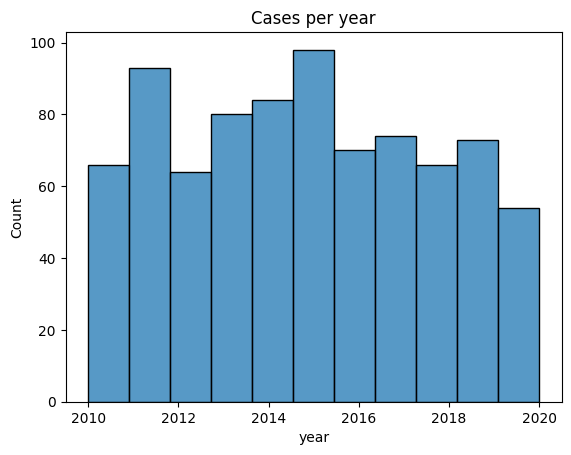

In [70]:
# Let's have plot of frquency of the cases over time in a plot...
sns.histplot(data=hospital_data_clean, x='year', legend=True)
plt.title('Cases per year')

In [99]:
# Filter data for vaccinated patients
vaccinated_data = hospital_data_clean[hospital_data_clean['Vaccine'] == 1]

# Group data by year and count the number of vaccinated patients
vaccinated_counts = vaccinated_data.groupby('year').size()

print(vaccinated_counts)

year
2016    70
2017    74
2018    66
2019    73
2020    54
dtype: int64


# We observe that vaccine has been given from 2016. Let's calculate the average cases before 2016 and after 2016

In [104]:
# Filter data based on year
before_2016 = hospital_data_clean[hospital_data_clean['year'] < 2016]
after_2016 = hospital_data_clean[hospital_data_clean['year'] >= 2016]

# Count patients in each period
num_patients_before_2016 = len(before_2016)
num_patients_after_2016 = len(after_2016)

# Calculate the number of years in each period
num_years_before_2016 = len(before_2016['year'].unique())
num_years_after_2016 = len(after_2016['year'].unique())

# Calculate average patients per year
avg_patients_before_2016 = num_patients_before_2016 / num_years_before_2016
avg_patients_after_2016 = num_patients_after_2016 / num_years_after_2016

print("Average patients per year before 2016 (without vaccine):", avg_patients_before_2016)
print("Average patients per year after 2016 (with vaccine):", avg_patients_after_2016)

Average patients per year before 2016 (without vaccine): 80.83333333333333
Average patients per year after 2016 (with vaccine): 67.4


In [105]:
# Let's do more analysis in this datasets!
affected_by_year = hospital_data_clean.groupby('year')['Outcome'].count().reset_index()
affected_by_year

,year,Outcome
0,2010,66
1,2011,93
2,2012,64
3,2013,80
4,2014,84
5,2015,98
6,2016,70
7,2017,74
8,2018,66
9,2019,73


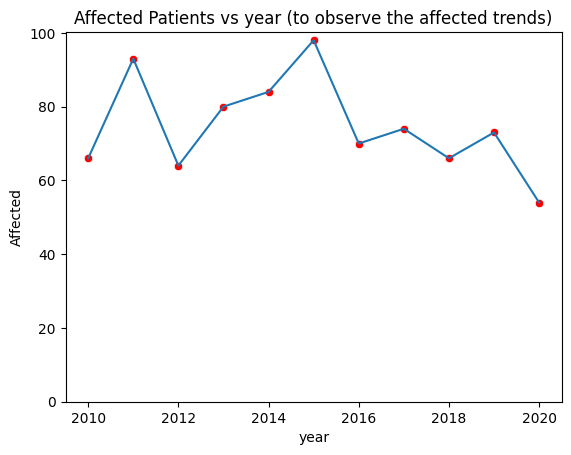

In [106]:
sns.lineplot(x=affected_by_year['year'], y=affected_by_year['Outcome'])
sns.scatterplot(x=affected_by_year['year'], y=affected_by_year['Outcome'], color='red', marker='o')
plt.xlabel('year')
plt.ylabel('Affected')
plt.title('Affected Patients vs year (to observe the affected trends)')
plt.ylim(bottom=0)
plt.show()

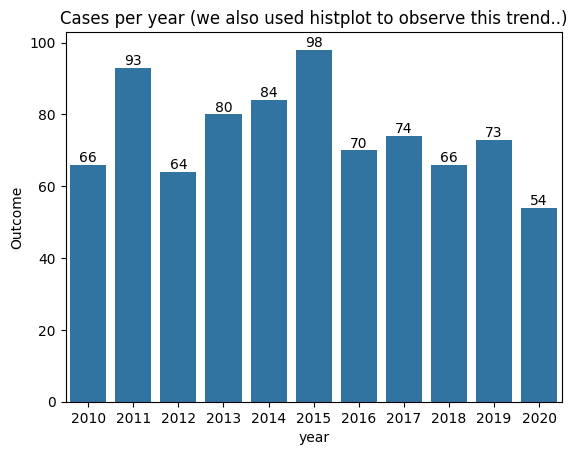

In [108]:
# Bar plot.... (we can also bar plot instead of histogram..)
ax = sns.barplot(x='year', y='Outcome', data=affected_by_year)
ax.bar_label(ax.containers[0])
plt.title('Cases per year (we also used histplot to observe this trend..)')
plt.show()

Let's see the distribution of age of the affected patients..

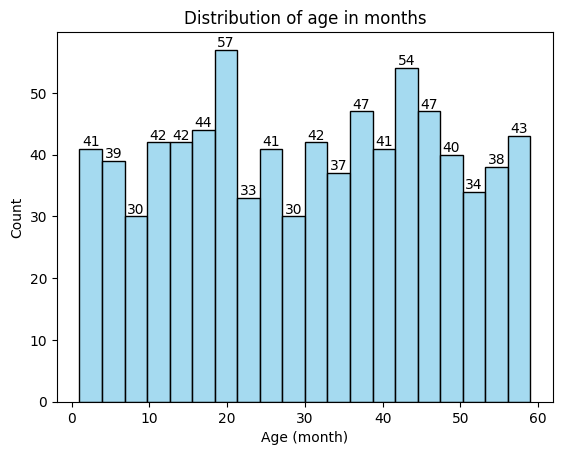

In [109]:
# Bar plot....
ax = sns.histplot(data=hospital_data_clean, x='Age (month)', legend=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of age in months')
ax.bar_label(ax.containers[0])
plt.show()

In [110]:
# Let's see the age distribution in more detailed for 0 to 5 month, 5 to 10 month and etc,.

age_organism_data = hospital_data_clean[['Age (month)', "Organism"]]

# Define age bins and their corresponding labels

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, np.inf]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '>55']

# Now let's Bin Age (months) data into categorical 'age_bin' using defined bins and labels

age_organism_data['age_bin'] = pd.cut(age_organism_data['Age (month)'], bins=bins, labels=labels, right=False)

# Group by 'age_bin' and count 'Organism' references, then reset index for plotting

age_bin_child = age_organism_data.groupby('age_bin')['Organism'].count().reset_index().rename(columns={'Organism':'Count'})

print(age_organism_data)
print(age_bin_child)

     Age (month)   Organism age_bin
0             14  Organism1   10-15
1              9  Organism1    5-10
2             13  Organism1   10-15
3             54  Organism1   50-55
4             42  Organism1   40-45
..           ...        ...     ...
817            5  Organism7    5-10
818           14  Organism7   10-15
819           21  Organism7   20-25
820            9  Organism7    5-10
821           58  Organism7     >55

[822 rows x 3 columns]
   age_bin  Count
0       <5     52
1     5-10     58
2    10-15     72
3    15-20     75
4    20-25     71
5    25-30     71
6    30-35     66
7    35-40     70
8    40-45     85
9    45-50     78
10   50-55     60
11     >55     64


C:\Users\fahim\AppData\Local\Temp\ipykernel_15348\778513120.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_organism_data['age_bin'] = pd.cut(age_organism_data['Age (month)'], bins=bins, labels=labels, right=False)
C:\Users\fahim\AppData\Local\Temp\ipykernel_15348\778513120.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_child = age_organism_data.groupby('age_bin')['Organism'].count().reset_index().rename(columns={'Organism':'Count'})


In [119]:
# Define age bins and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, np.inf]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '>55']

# Create the 'age_bin' column directly using .loc (avoids copy)
age_organism_data.loc[:, 'age_bin'] = pd.cut(age_organism_data['Age (month)'], bins=bins, labels=labels, right=False)

# Group by 'age_bin' and count 'Organism' references
age_bin_child = (
    age_organism_data.groupby('age_bin', observed=True)['Organism'].count().reset_index().rename(columns={'Organism': 'Count'})
)

print(age_organism_data.head())  # Display the first few rows of the modified DataFrame
print(age_bin_child)  # Display the counts by age bin

   Age (month)   Organism age_bin
0           14  Organism1   10-15
1            9  Organism1    5-10
2           13  Organism1   10-15
3           54  Organism1   50-55
4           42  Organism1   40-45
   age_bin  Count
0       <5     52
1     5-10     58
2    10-15     72
3    15-20     75
4    20-25     71
5    25-30     71
6    30-35     66
7    35-40     70
8    40-45     85
9    45-50     78
10   50-55     60
11     >55     64


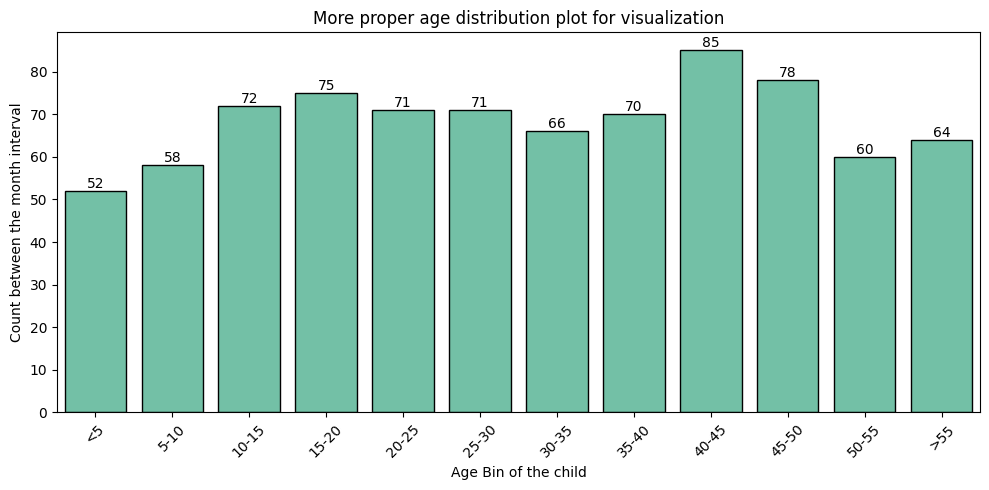

In [120]:
# Let's plot these age distribution in a bar plot..
plt.figure(figsize=(10, 5))

ax = sns.barplot(x='age_bin', y='Count', data=age_bin_child, color = '#66cdaa', edgecolor='black')

plt.xlabel('Age Bin of the child')
plt.ylabel('Count between the month interval')
plt.title('More proper age distribution plot for visualization')
plt.xticks(rotation=45)
plt.tight_layout()  # adjust the layout for proper inteval...

ax.bar_label(ax.containers[0])
plt.show()

### Outcome Analysis

In [125]:
# outcome_counts
outcome_counts = hospital_data_clean.groupby('Outcome')['Organism'].count().reset_index().rename(columns={'Organism':'Count'})
lst = hospital_data_clean['Outcome'].unique()
slice_colors = ['#80a42e', '#c04b4b', '#a56f8f', '#edca62']
outcome_counts


,Outcome,Count
0,DORB,215
1,Died,201
2,Discharged,192
3,Referred,214


In [127]:
outcome_counts['Count']

0    215
1    201
2    192
3    214
Name: Count, dtype: int64

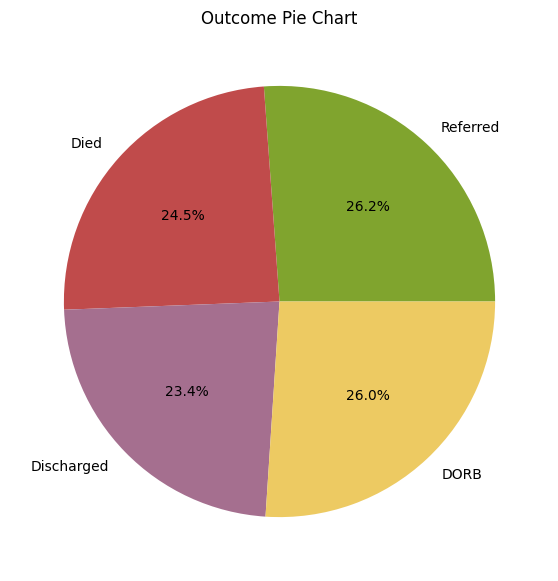

In [129]:
# Let's plot a pie chart showing the outcomes of the patients..
plt.figure(figsize=(7, 7))
plt.pie(outcome_counts['Count'], labels=lst, autopct='%1.1f%%', colors=slice_colors)
plt.title('Outcome Pie Chart')

plt.show()

In [ ]:
# lst = []
# lst.extend(outcome_counts['Outcome'])
print(lst)

['Referred' 'Died' 'Discharged' 'DORB']


### Last Two years data analysis

In [131]:
last_two_years = hospital_data_clean['year'].unique()[-2:]
last_two_years_data = hospital_data_clean[hospital_data_clean['year'].isin(last_two_years)]
last_two_years_data

,Age (month),Case Definition,Zila,Outcome,Vaccine,year,Organism,source,method,Duration
695,9,Very Severe Disease,Khulna,Referred,1,2019,Organism7,both,ICT,16
696,40,Missing,Mymensingh,Referred,1,2019,Organism7,both,PCR,13
697,35,Very Severe Disease,Khulna,Died,1,2019,Organism7,Blood,culture,10
698,20,Pneumonia,Chittagong,DORB,1,2019,Organism7,CSF,culture,24
699,35,Enteric Fever,Khulna,Discharged,1,2019,Organism7,Blood,culture,12
...,...,...,...,...,...,...,...,...,...,...
817,5,Severe Pneumonia,Khulna,Referred,1,2020,Organism7,CSF,culture,23
818,14,Severe Pneumonia,Rajshahi,Referred,1,2020,Organism7,both,PCR,7
819,21,Not eligible,Barisal,Died,1,2020,Organism7,CSF,culture,16
820,9,Pneumonia,Rangpur,Died,1,2020,Organism7,CSF,PCR,26


In [132]:
# Now let's organize the data according to the division
summary = last_two_years_data.groupby(['Zila', 'year']).size().reset_index().rename(columns={0: 'cases'})
summary

,Zila,year,cases
0,Barisal,2019,7
1,Barisal,2020,7
2,Chittagong,2019,8
3,Chittagong,2020,6
4,Dhaka,2019,7
5,Dhaka,2020,7
6,Khulna,2019,10
7,Khulna,2020,8
8,Mymensingh,2019,6
9,Mymensingh,2020,5


In [ ]:
# def hex_to_rgb(hex_code):
#     hex_code = hex_code.lstrip('#')  # Remove the '#' if present
#     r, g, b = tuple(int(hex_code[i:i + 2], 16) for i in (0, 2, 4))
#     return r, g, b

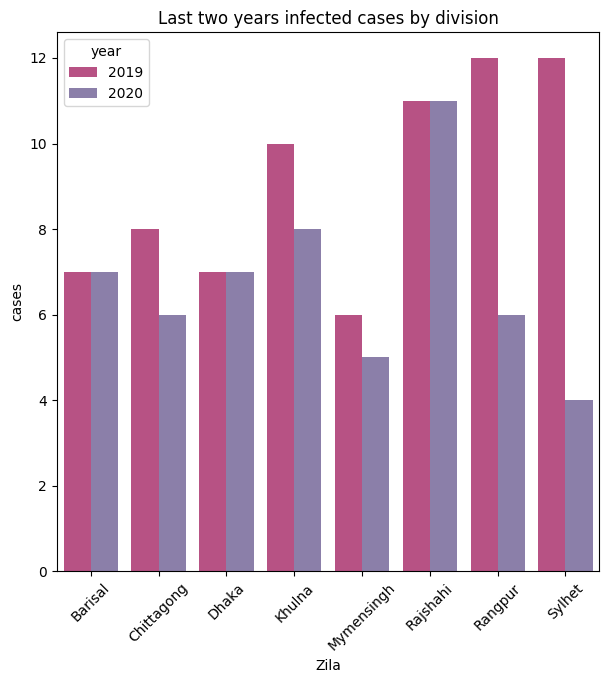

In [ ]:
# Now let's plot this summary data
hex_colors = ['#c84184', '#8878b0']
# colors = hex_to_rgb(hex_colors)

plt.figure(figsize=(7, 7))
sns.barplot(data=summary, x='Zila', y='cases', hue='year', palette=hex_colors)

plt.title('Last two years infected cases by division')
plt.xticks(rotation=45)
plt.show()

### Year wise boxplot of hospital duration

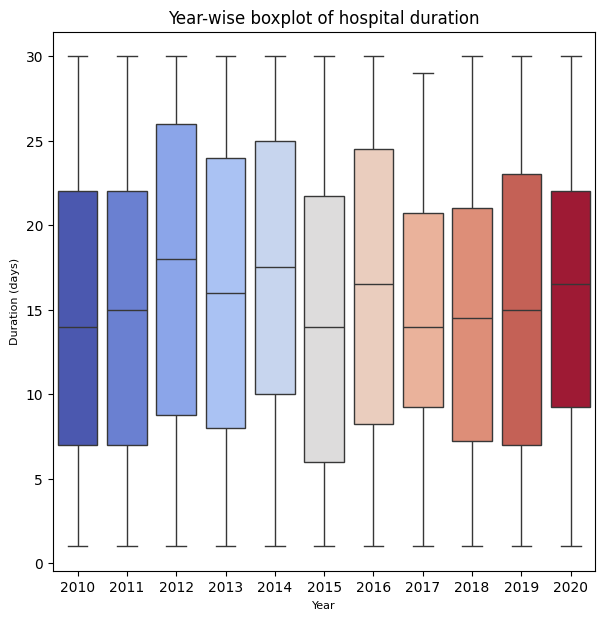

In [139]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=hospital_data_clean, x='year', y='Duration', hue='year', palette='coolwarm', legend=False) 
plt.title("Year-wise boxplot of hospital duration")
plt.xlabel('Year', fontsize=8)
plt.ylabel("Duration (days)", fontsize=8)
plt.grid(False)
plt.show()

Let's also observe the case in dhaka (captial city of Dhaka with advanced hospital systems) and outside of dhaka (rural areas)

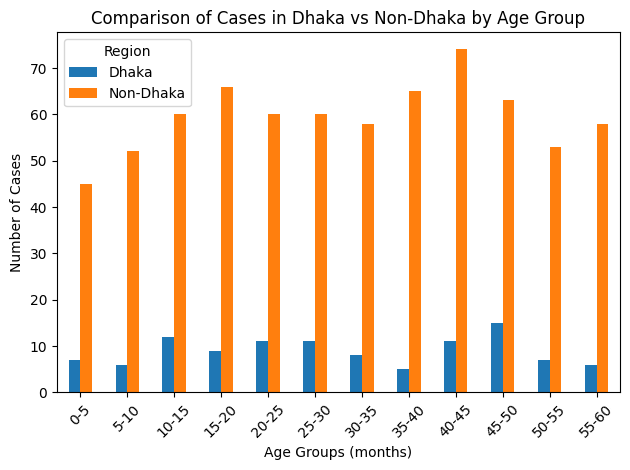

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = hospital_data_clean

# Define age ranges
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age (month)'], bins=bins, labels=labels, right=False)

# Split the data into Dhaka and Non-Dhaka
df['Region'] = df['Zila'].apply(lambda x: 'Dhaka' if x == 'Dhaka' else 'Non-Dhaka')

# Group by age group and region
grouped = df.groupby(['AgeGroup', 'Region'], observed=True).size().unstack(fill_value=0)

# Plot the histogram
grouped.plot(kind='bar', stacked=False)

# Customizing the plot
plt.xlabel('Age Groups (months)')
plt.ylabel('Number of Cases')
plt.title('Comparison of Cases in Dhaka vs Non-Dhaka by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()


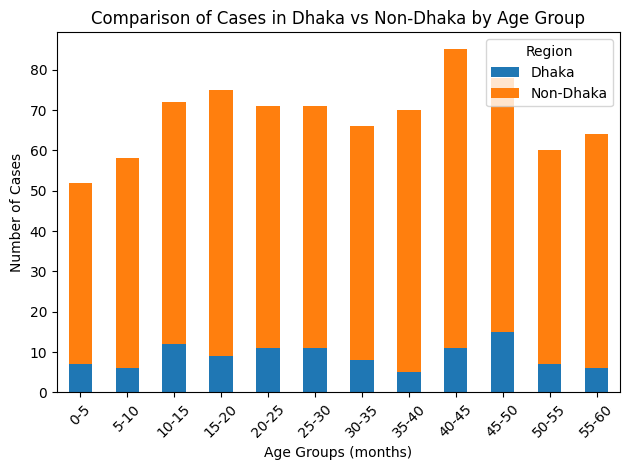

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = hospital_data_clean

# Define age ranges
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age (month)'], bins=bins, labels=labels, right=False)

# Split the data into Dhaka and Non-Dhaka
df['Region'] = df['Zila'].apply(lambda x: 'Dhaka' if x == 'Dhaka' else 'Non-Dhaka')

# Plot the histogram
ax = grouped.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Customizing the plot
ax.set_xlabel('Age Groups (months)')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Cases in Dhaka vs Non-Dhaka by Age Group')
ax.set_xticklabels(labels, rotation=45)
ax.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# Prediction Case on this dataset...

In [1]:
#...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Encoding categorical variables
categorical_cols = ['Case Definition', 'Zila', 'Outcome', 'Organism', 'source', 'method', 'Vaccine']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    hospital_data_clean[col] = le.fit_transform(hospital_data_clean[col])
    label_encoders[col] = le

# Verify the data after encoding
hospital_data_clean.head()


NameError: name 'hospital_data_clean' is not defined